# Выявление закономерностей, определяющих успешность игры для планирования рекламных кампаний в интернет-магазине

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в интернет-магазине.

## Шаг 1. Данные

### Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Таблица содержит пропуски, обильное их наличие наблюдается в столбцах Critic_Score, User_Score и Rating. Возможно не для всех игр известны оценки или произошла ошибка при заполнении данных. Year_of_Release и Critic_Score следует привести к типу int, User_Score - к типу float. Также стоит названия столбцов привести к нижнему регистру.

## Шаг 2. Предобработка данных

In [3]:
# названия столбцов в нижний регистр
games.columns = games.columns.str.lower()

In [4]:
# посмотрим на данные с неизвестным годом релиза
games.query('year_of_release.isna()') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
games.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Заполнить пропуски в столбце year_of_release взяв известное значение для конкретной игры не получится, т.к. на разных платформах игра может выходить в разное время, что хорошо видно на примере выше. Поэтому заполнение пропуска известным значением для одной из платформ может исказить данные и лучше строки с пропущенными значениями не рассматривать. 

Заполнение такого количества пропусков (более 40 %) в столбцах с рейтингом средними значениями или другими подобными методами приведет к искажению реальной картины. Разумнее будет оставить эти пропуски без изменений. В столбце user_score присутствуют значения tbd, что означает, что рейтинг еще не определен, фактически это значение NaN и надо к нему прировнять такие значения, чтобы было возмжно перевести столбец user_score из строкового типа в числовой.

In [6]:
# заменяем значения tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan) 

In [7]:
#преобразование типов столбцов
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# 2 строки с отсутствующими названиями игры и жанра не играют роли, избавимся от них
games = games.loc[~(games.loc[:, 'name'].isna())].reset_index(drop=True) 

In [10]:
# all_sales - сумма продаж по всем регионам
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

Пропуски в стобцах с рейтингом и годом выпуска игры решено было оставить, так как корректное заполнение таких пропусков не представляется возможным. Обработаны значения *tbd* в столбце user_score. Все названия столбцов приведены к нижнему регистру. Столбцы year_of_release и critic_score преведены к целочисленному типу, столбец user_score к типу float.

## Шаг 3. Исследовательский анализ данных

In [11]:
#количество выпущенных игр за каждый год
number_of_games = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
number_of_games

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Ярко выражен возрастающий тренд к 2008 году. До 1995 года выходило меньше сотни игр, эти года не представляют интереса.

In [12]:
platform_all_sales = games.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
platform_all_sales

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [13]:
# список платформ с наибольшими продажами
top10platform = platform_all_sales.head(10).index.get_level_values(0).to_list()
top10platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [14]:
platform_and_years = games.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
platform_and_years

,platform,year_of_release,all_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


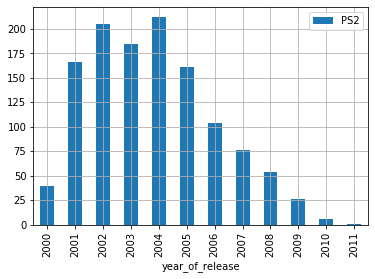

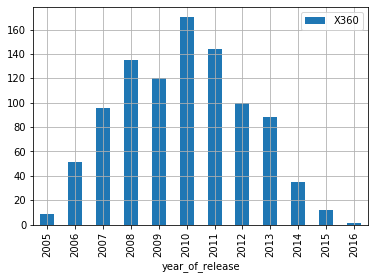

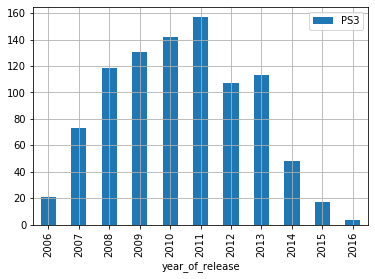

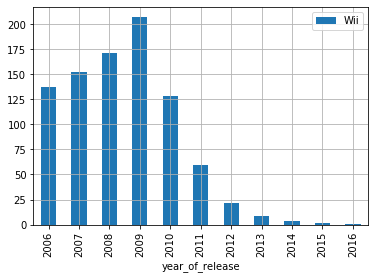

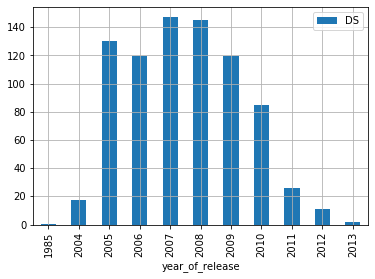

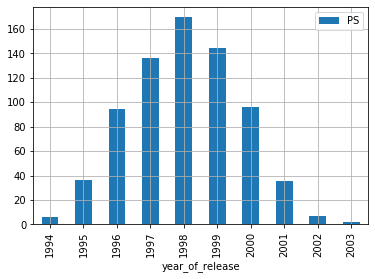

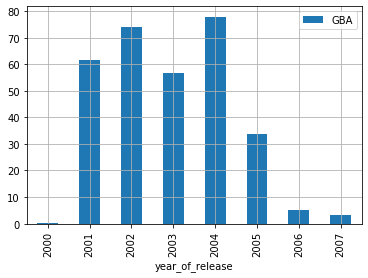

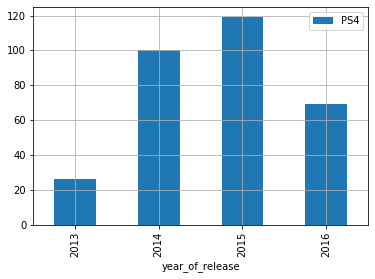

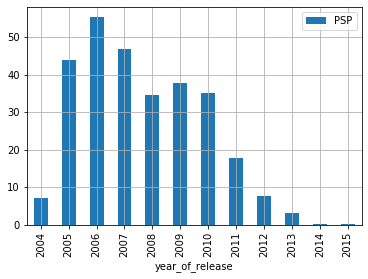

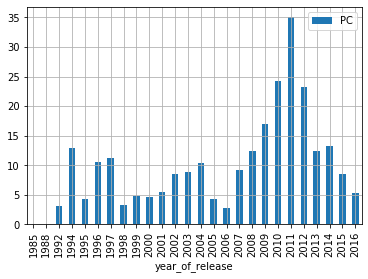

In [15]:
for plat in top10platform:
    temp = platform_and_years[platform_and_years['platform'] == plat]
    temp.plot(kind='bar', x='year_of_release', y='all_sales', legend=True, grid=True, label=plat)
    plt.show()

Большенство платформ живут от 5 до 10 лет, это связано с тем, что выходят новые более мощные и быстрые платформы. Исключение составляет PC.

Возьмем актуальный период с 2013 года, когда все древние платформы ушли с рынка.

In [16]:
games_new = games.loc[games.loc[:, 'year_of_release'] >= 2013]
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [17]:
platform_and_years_new = games_new.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()

In [18]:
platform = platform_and_years_new['platform'].unique().tolist()
platform

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

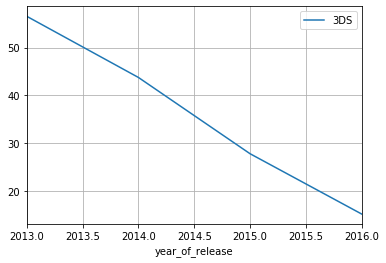

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2013.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


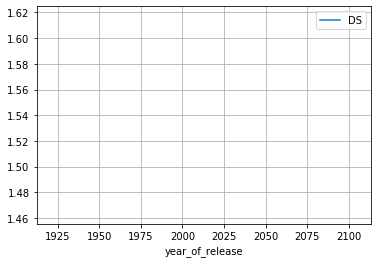

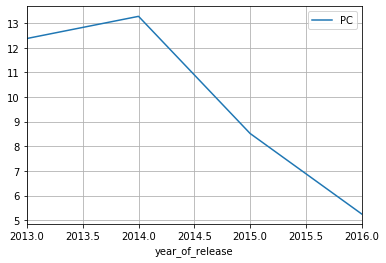

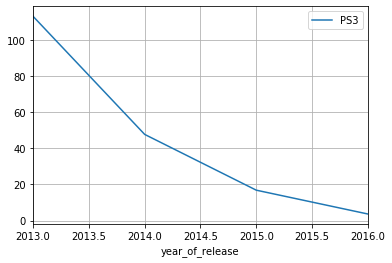

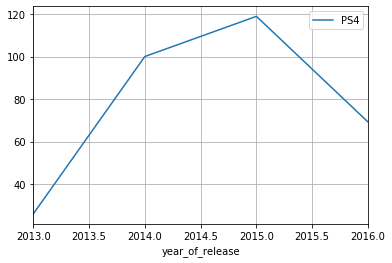

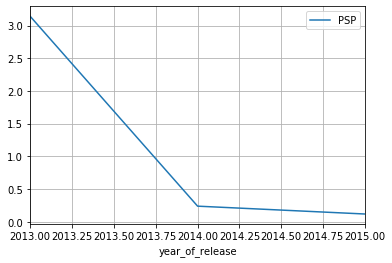

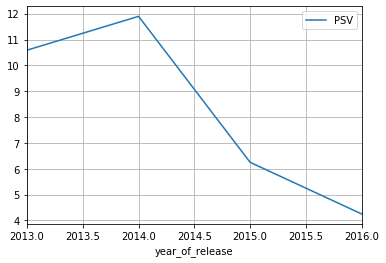

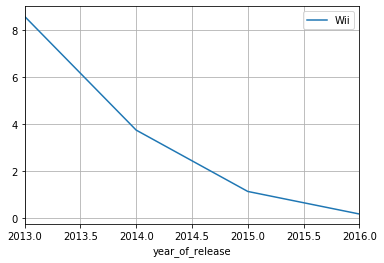

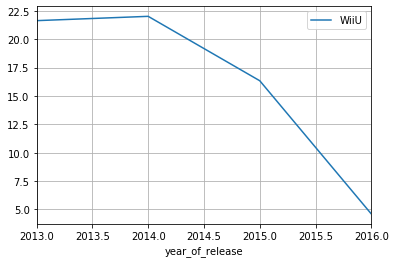

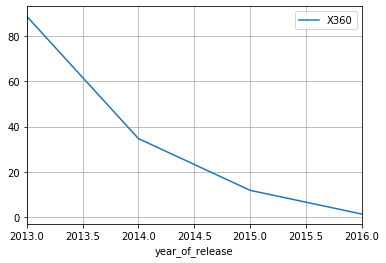

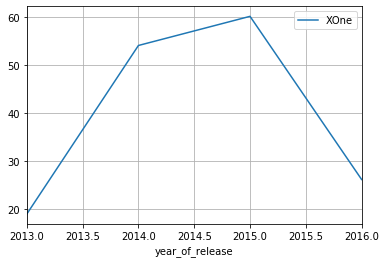

In [19]:
for plat in platform:
    temp = platform_and_years_new[platform_and_years_new['platform'] == plat]
    temp.plot(x='year_of_release', y='all_sales', legend=True, grid=True, label=plat)
    plt.show()

На 2016 год лидируют по продажам платформы PS4 и XOne. Для всех платформ наблюдается падение продаж к 2016 году. Также в список перспективных платформ следует добавить PC так как это вечная платформа, которая точно останется на рынке.

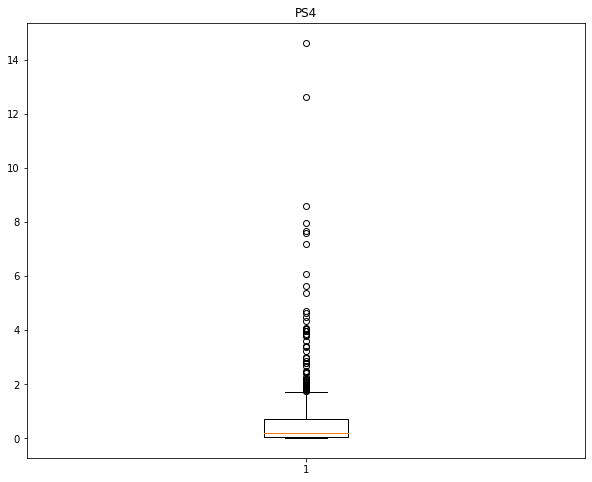

In [20]:
#график boxplot для платформы PS4
ps4 = games_new.loc[games_new.loc[:, 'platform'] == 'PS4']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('PS4')
ax1.boxplot(ps4['all_sales'])
plt.show()

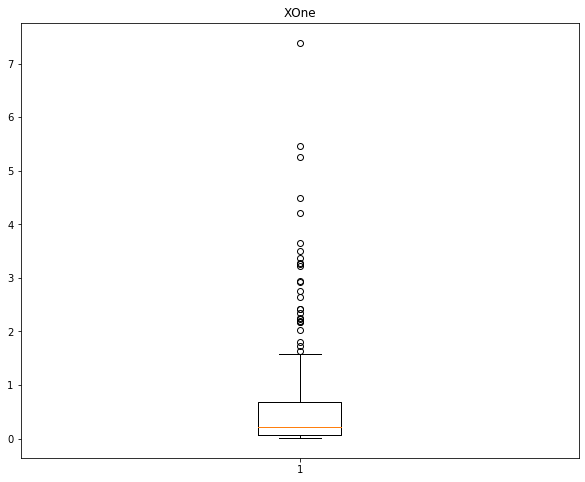

In [21]:
#график boxplot для платформы PS4
xone = games_new.loc[games_new.loc[:, 'platform'] == 'XOne']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('XOne')
ax1.boxplot(xone['all_sales'])
plt.show()

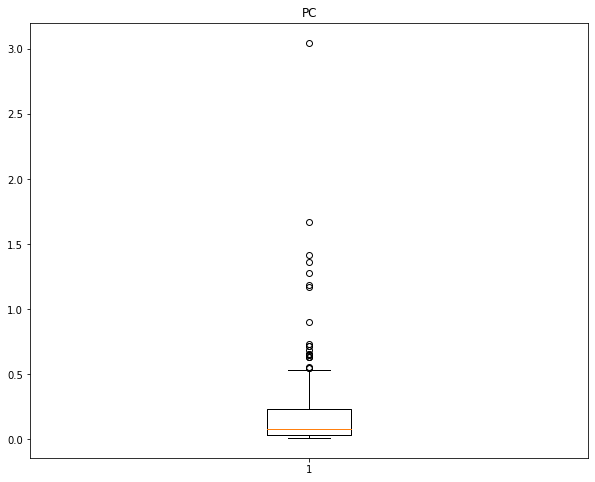

In [22]:
#график boxplot для платформы PS4
pc = games_new.loc[games_new.loc[:, 'platform'] == 'PC']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('PC')
ax1.boxplot(pc['all_sales'])
plt.show()

PC отстает по продажам от PS4 и XOne, однако не так значительно, если рассматривать медианные значения. У всех платформ наблюдается длинный хвост вверх, т.к. присутствуют выбросы с крупными продажами. Медианные значения у PS4 и XOne примерно одинаковые, но у PS4 большее количество крупных продаж за счет чего верхняя граница графика у PS4 смещена выше, чем у XOne.

In [23]:
print('среднее значение продаж для платформы PS4:', ps4['all_sales'].mean())
print('среднее значение продаж для платформы XOne:', xone['all_sales'].mean())
pc['all_sales'].mean()

среднее значение продаж для платформы PS4: 0.8013775510204081
среднее значение продаж для платформы XOne: 0.6450202429149797


0.20862433862433863

Как и следовало ожидать средние значения продаж разсличаются и наибольшее среднее значение у PS4 (0.8 млн $).

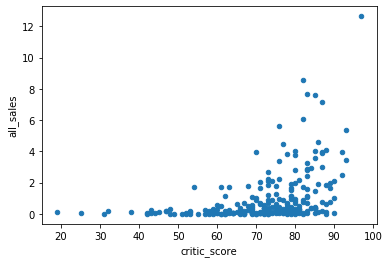

In [24]:
#продажи для PS4 в зависимости от оценки критиков
ps4.plot(kind='scatter', x='critic_score', y='all_sales') 

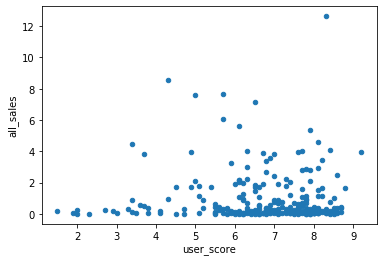

In [25]:
#продажи для PS4 в зависимости от отзывов пользователей
ps4.plot(kind='scatter', x='user_score', y='all_sales') 

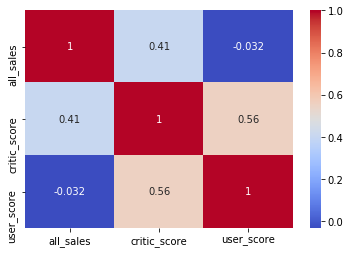

In [26]:
ps4_corr = ps4.loc[:, ['all_sales', 'critic_score', 'user_score']]
sns.heatmap(ps4_corr.corr(), annot=True, cmap='coolwarm')

На первом графике видно, что с увеличением оценки критиков, возрастают продажи. Зависимость продаж от рейтинга пользователей более хаотична. Можно предположить, что пользователи при покупки игр ориентируются больше на оценку критиков.

Проделаем тоже самое для платформ XOne и PC.

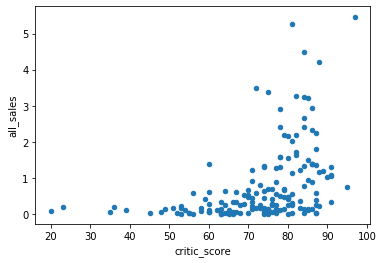

In [27]:
#продажи для XOne в зависимости от оценки критиков
xone.plot(kind='scatter', x='critic_score', y='all_sales') 

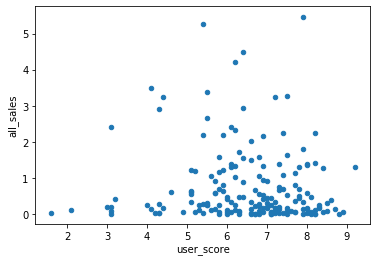

In [28]:
#продажи для XOne в зависимости от отзывов пользователей
xone.plot(kind='scatter', x='user_score', y='all_sales') 

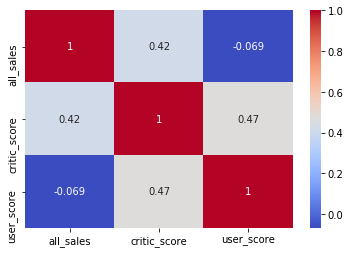

In [29]:
xone_corr = xone.loc[:, ['all_sales', 'critic_score', 'user_score']]
sns.heatmap(xone_corr.corr(), annot=True, cmap='coolwarm')

Зависимости продаж от оценок критиков и пользователей для XOne ведут себя аналогично PS4.

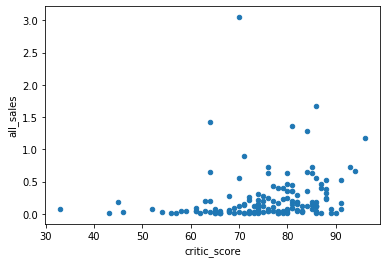

In [30]:
#продажи для PC в зависимости от оценки критиков
pc.plot(kind='scatter', x='critic_score', y='all_sales') 

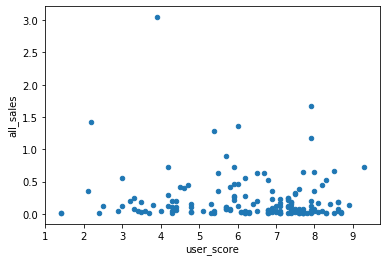

In [31]:
#продажи для PC в зависимости от отзывов пользователей
pc.plot(kind='scatter', x='user_score', y='all_sales') 

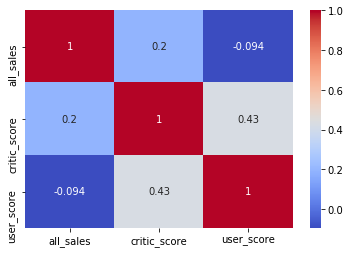

In [32]:
pc_corr = pc.loc[:, ['all_sales', 'critic_score', 'user_score']]
sns.heatmap(pc_corr.corr(), annot=True, cmap='coolwarm')

Для PC уже не такая явная зависимость продаж от оценки критиков, но все же заметно возрастание продаж для оценок критиков больше 60.

In [33]:
group_genre = games_new.pivot_table(index='genre', values='all_sales', aggfunc='sum').reset_index()
group_genre

,genre,all_sales
0,Action,321.87
1,Adventure,23.64
2,Fighting,35.31
3,Misc,62.82
4,Platform,42.63
5,Puzzle,3.17
6,Racing,39.89
7,Role-Playing,145.89
8,Shooter,232.98
9,Simulation,21.76


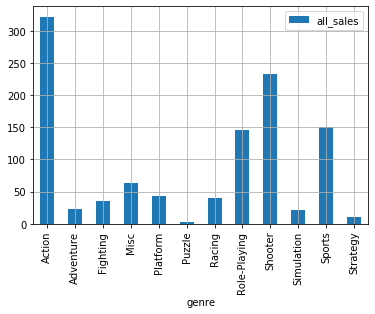

In [34]:
group_genre.plot(kind='bar', x='genre', y='all_sales', legend=True, grid=True)

Наиболее популярные жанры - это экшен, шутер, спортивные и ролевые игры (особенно выделяется жанр экшен). Наименее популярны пазлы и стратегии.

### Вывод

- Выбран актуальный период для анализа начиная с 2013 года, когда пошел тренд снижения покупок игр; 
- Показано, что платформы обычно живут от 5 до 10 лет, это связано с тем, что они устаревают и появляются новые более актуальные платформы;
- Наблюдается снижение продаж на всех платформах к 2016 году;
- Выбраны наиболее перспективные платформы: PS4, XOne и PC;
- Медианные значения продаж у PS4 и XOne примерно равно, но PS4 имеет больше крупных продаж, которые выходят за график boxplot, за счет чего смещено вверх среднее значение и у PS4 этот показатель равен 0.8, в то время как у XOne среднее равно ~ 0.65 млн $;
- При покупке игр пользователи чаще обращают внимание на рейтинг критиков, чем на оценки других пользователей;
- Наиболее популярные жанры - это Action, Shooter, Sports и Role-Playing.


## Шаг 4. Портрет пользователя каждого региона

In [35]:
# топ-5 популярных платформ в Северной Америке
games_new.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [36]:
# топ-5 популярных платформ в Европе
games_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [37]:
# топ-5 популярных платформ в Японии
games_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


В Европе и Америке лидирующую позицию занимает PS4. В Японии в топ-5 входят сугубо японские платформы, странно, что PS4 занимает 4 позицию, в принципе, японцы сами по себе странные ребята.

In [38]:
# топ-5 популярных жанров в Северной Америке
games_new.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [39]:
# топ-5 популярных жанров в Европе
games_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [40]:
# топ-5 популярных жанров в Японии
games_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В Европе и Америке топ-5 жанров практически одинаков (отличие есть только в 5-ой строчке), в Японии же мы видим польностью другую картину. Культурные особенности Европы и Америки очень близки и разительно отличаются от японских, этим и объясняется разница в топе жанров.

In [41]:
# рейтинг ESRB и продажи в Северной Америке
games_new.pivot_table(index='rating', values='na_sales', aggfunc='sum')

,na_sales
rating,
E,79.05
E10+,54.24
M,165.21
T,49.79


In [42]:
# рейтинг ESRB и продажи в Европе
games_new.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

,eu_sales
rating,
E,83.36
E10+,42.69
M,145.32
T,41.95


In [43]:
# рейтинг ESRB и продажи в Японии
games_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

,jp_sales
rating,
E,15.14
E10+,5.89
M,14.11
T,20.59


Снова Европа и Америка показывают похожие результаты, в обоих регионах наиболее популярны игры с рейтингом для взрослых. В Японии больше всего продаются игры для подростков. Это объясняется жанровыми предпочтениями. В Европе и Америке пользователи любят игры жанра эшен и шутеры, которые чаще получают рейтинг M.

### Вывод

Топ-5 популярных платформ и жанров в Европе и Америке практически одинаковые. Самая популярная платформа PS4, а самый популярный жанр игр - это Action. В Япони наиболее популярная платформа 3DS, а жанр Role-Playing. В Европе и Америке чаще продают игры с рейтингом "Для взрослых", а в Японии - "Для подростков".

## Шаг 5. Проверка гипотез

Проверим следующую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Пусть это будет гипотеза H0, следовательно альтернативная гипотеза будет звучать так: Средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу.

In [44]:
user_score_pc = games_new.loc[(games_new.loc[:, 'platform'] == 'PC') & (~(games_new.loc[:, 'user_score'].isna()))]['user_score']
user_score_xone = games_new.loc[(games_new.loc[:, 'platform'] == 'XOne') & (~(games_new.loc[:, 'user_score'].isna()))]['user_score']

In [45]:
alpha = .05
results_platform = st.ttest_ind(user_score_xone, user_score_pc)
if results_platform.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')
results_platform.pvalue

не получилось отвергнуть нулевую гипотезу


0.14012658403611647

Вероятность 14 %, что средние значения пользовательских рейтингов для PC и Xbox One будут иметь такое или еще большее отличие слишком высока, чтобы мы могли отвергнуть нулевую гипотезу. Значит, придерживаемся вывода, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Соответственно это будет альтернативная гипотеза, а нулевая будет гласить, что рейтинги одинаковые.

In [46]:
user_score_action = games_new.loc[(games_new.loc[:, 'genre'] == 'Action') & (~(games_new.loc[:, 'user_score'].isna()))]['user_score']
user_score_sports = games_new.loc[(games_new.loc[:, 'genre'] == 'Sports') & (~(games_new.loc[:, 'user_score'].isna()))]['user_score']

In [47]:
results_genre = st.ttest_ind(user_score_action, user_score_sports)
if results_genre.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')
results_genre.pvalue

отвергаем нулевую гипотезу


1.0517832389140023e-27

Вероятность достаточно низкая, чтобы отвергнуть нулевую гипотезу.

### Вывод

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

- Обработаны данные о продажах игр до 2017 года. 
- Анализ продаж по платформам показал, что время жизни игровой платформы составляет от 5 до 10 лет, за исключением PC. 
- Выделены три наиболее перспективные к 2016 году платформы: PS4, XOne и PC. Лидирует по продажам платформа PS4 за счет большего количества крупных продаж, за ней с небольшим отставанием идет XOne. Средние значения продаж у данных платформ равны соответственно 0.8 и 0.65 млн $. 
- Исследованы зависимости продаж от отзывов пользователей и критиков. Из них можно сделать вывод, что пользователи склоны прислушиваться к критикам при выборе игр. 
- Наиболее популярными жанрами являются Action, Shooter, Sports и Role-Playing. 
- Портрет пользователя у регионов Европа и Северная Америка практически одинаков, наиболее популярной является платформа PS4, а самый популярный жанр - Action. Японцы предпочитают свои местного производства платформы и чаще покупают 3DS, а любимый жанр у пользователя из Японии - Role-Playing, в силу культурных отличий и интересов японцев от других регионов.
- Европейцы и американцы чаще покупают игры с рейтингом "Для взрослых", в то время как японцы чаще берут "Для подростков".
- Проверены две статистические гипотезы и сделаны выводы о том, что: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.